**Author** : [Mochammad Arie Nugroho](https://github.com/arienugroho050396)

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:\My Files\Document\Coding\Datasheet\winequality-red.csv')
df.shape

(1599, 12)

In [3]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [5]:
new=[]
for row in df['quality']:
    if (row<=5):
        val=1
    else:
        val=2
    new.append(val)

In [6]:
df['newquality']=new

In [7]:
from collections import Counter
print(sorted(Counter(df['newquality']).items()))

[(1, 744), (2, 855)]


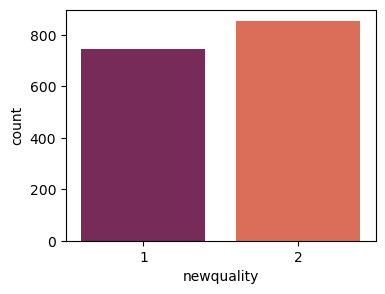

In [8]:
plt.figure(figsize = (4,3))
sns.countplot(df['newquality'],palette='rocket')
plt.show()

In [9]:
X=df.drop(['quality','newquality'],axis=1)
y=df['newquality']

In [10]:
#dividing the dataset into train and test sets
from sklearn.model_selection import train_test_split
x_train1,x_test,y_train1,y_test=train_test_split(X,y,test_size=0.20,random_state=1234)

### Resampling with Synthetic Minority Oversampling Technique

In [11]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train1, y_train1)

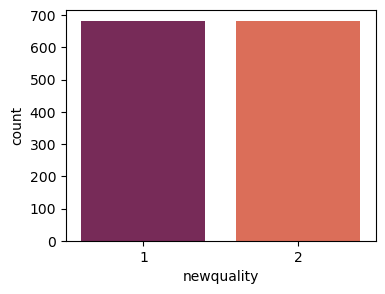

In [12]:
plt.figure(figsize = (4,3))
sns.countplot(y_train,palette='rocket')
plt.show()

In [13]:
print(sorted(Counter(y_train).items()))

[(1, 683), (2, 683)]


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

#libraries for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

train accuracy: 0.7489019033674963 
 test accuracy: 0.771875


classification report for logistic regression
              precision    recall  f1-score   support

           1       0.80      0.73      0.77       163
           2       0.74      0.82      0.78       157

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320



confusion matrix for logistic regression


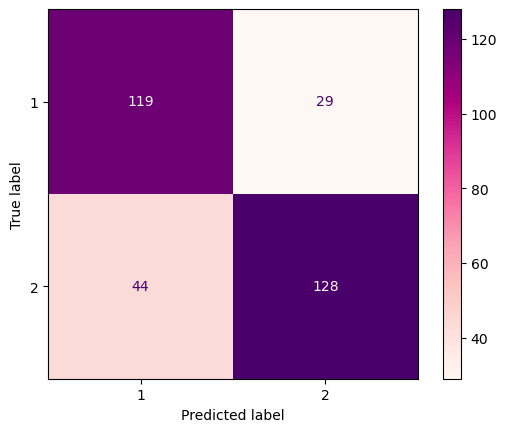

In [15]:
#logistic regression
lr = LogisticRegression(max_iter=20000,penalty='l2')
model1=lr.fit(x_train, y_train)
print("train accuracy:",model1.score(x_train, y_train),"\n","test accuracy:",model1.score(x_test,y_test))
lrpred = lr.predict(x_test)
print("\n")
print("classification report for logistic regression")
print(classification_report(lrpred,y_test))
print("\n")
print("confusion matrix for logistic regression")
displr = plot_confusion_matrix(lr, x_test, y_test,cmap=plt.cm.RdPu , values_format='d')
plt.show(displr)

train accuracy: 0.7496339677891655 
 test accuracy: 0.775


classification report for linear discriminant analysis
              precision    recall  f1-score   support

           1       0.80      0.73      0.77       162
           2       0.75      0.82      0.78       158

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.77       320
weighted avg       0.78      0.78      0.77       320



confusion matrix for linear discriminant analysis


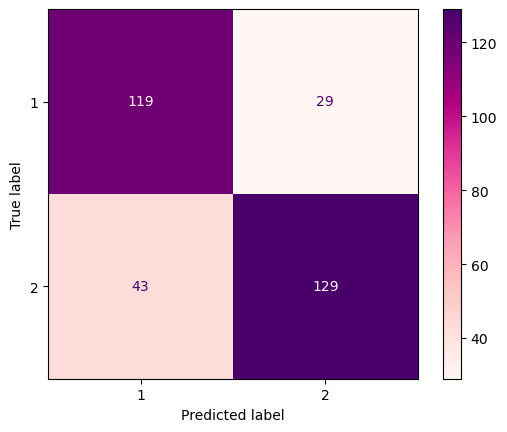

In [16]:
#linear discriminant analysis
lda = LinearDiscriminantAnalysis()
model2=lda.fit(x_train, y_train)
print("train accuracy:",model2.score(x_train, y_train),"\n","test accuracy:",model2.score(x_test,y_test))

ldapred = lda.predict(x_test)
print("\n")
print("classification report for linear discriminant analysis")
print(classification_report(ldapred,y_test))
print("\n")
print("confusion matrix for linear discriminant analysis")
displr = plot_confusion_matrix(lda, x_test, y_test ,cmap=plt.cm.RdPu , values_format='d')
plt.show(displr)

train accuracy: 1.0 
 test accuracy: 0.746875


classification report for decision tree classifier
              precision    recall  f1-score   support

           1       0.75      0.72      0.73       155
           2       0.74      0.78      0.76       165

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



confusion matrix for decision tree classifier


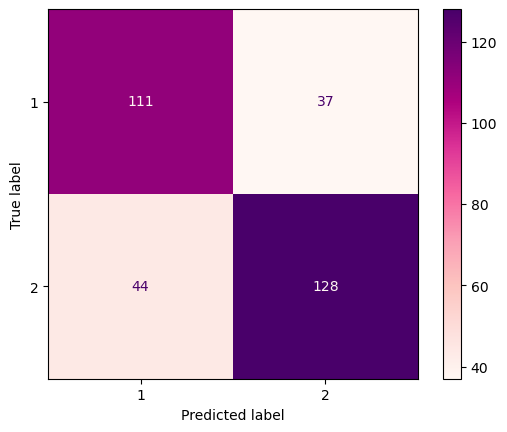

In [17]:
#decision tree classifier
dt=DecisionTreeClassifier()
model3=dt.fit(x_train, y_train)
print("train accuracy:",model3.score(x_train, y_train),"\n","test accuracy:",model3.score(x_test,y_test))

dtpred = dt.predict(x_test)
print("\n")
print("classification report for decision tree classifier")
print(classification_report(dtpred,y_test))
print("\n")
print("confusion matrix for decision tree classifier")
displr = plot_confusion_matrix(dt, x_test, y_test ,cmap=plt.cm.RdPu , values_format='d')
plt.show(displr)

train accuracy: 1.0 
 test accuracy: 0.846875


classification report for random forest classifier
              precision    recall  f1-score   support

           1       0.86      0.82      0.84       157
           2       0.83      0.88      0.85       163

    accuracy                           0.85       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.85      0.85      0.85       320



confusion matrix for random forest classifier


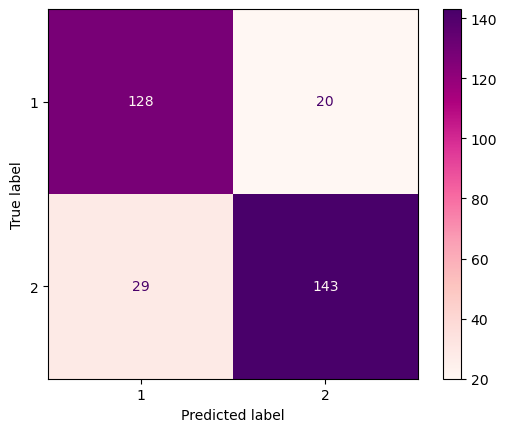

In [18]:
#random forest classifier
rf=RandomForestClassifier()
model4=rf.fit(x_train, y_train)
print("train accuracy:",model4.score(x_train, y_train),"\n","test accuracy:",model4.score(x_test,y_test))

rfpred = rf.predict(x_test)
print("\n")
print("classification report for random forest classifier")
print(classification_report(rfpred,y_test))
print("\n")
print("confusion matrix for random forest classifier")
displr = plot_confusion_matrix(rf, x_test, y_test ,cmap=plt.cm.RdPu , values_format='d')
plt.show(displr)

train accuracy: 0.9926793557833089 
 test accuracy: 0.815625


classification report for bagging classifier
              precision    recall  f1-score   support

           1       0.85      0.77      0.81       163
           2       0.78      0.86      0.82       157

    accuracy                           0.82       320
   macro avg       0.82      0.82      0.82       320
weighted avg       0.82      0.82      0.82       320



confusion matrix for bagging classifier


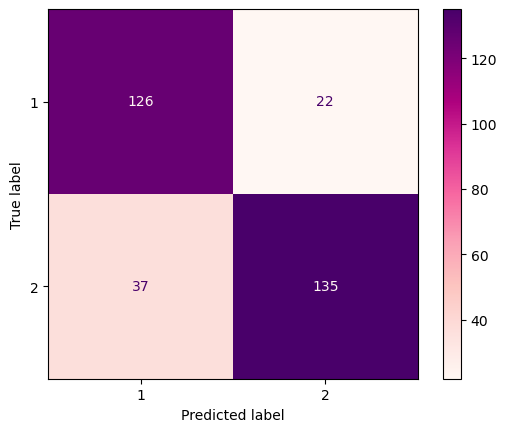

In [19]:
#bagging classifier
bg=BaggingClassifier()
model5=bg.fit(x_train, y_train)
print("train accuracy:",model5.score(x_train, y_train),"\n","test accuracy:",model5.score(x_test,y_test))

bgpred = bg.predict(x_test)
print("\n")
print("classification report for bagging classifier")
print(classification_report(bgpred,y_test))
print("\n")
print("confusion matrix for bagging classifier")
displr = plot_confusion_matrix(bg, x_test, y_test ,cmap=plt.cm.RdPu , values_format='d')
plt.show(displr)

train accuracy: 0.8777452415812591 
 test accuracy: 0.796875


classification report for gradient boosting classifier
              precision    recall  f1-score   support

           1       0.83      0.75      0.79       163
           2       0.77      0.84      0.80       157

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320



confusion matrix for gradient boosting classifier


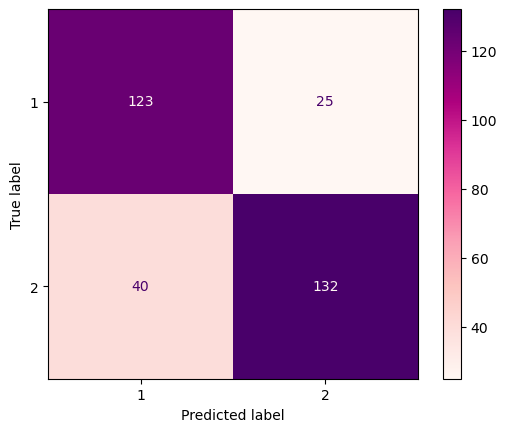

In [20]:
# gradient boost classifier 
gbm=GradientBoostingClassifier()
model6=gbm.fit(x_train, y_train)
print("train accuracy:",model6.score(x_train, y_train),"\n","test accuracy:",model6.score(x_test,y_test))

gbmpred = gbm.predict(x_test)
print("\n")
print("classification report for gradient boosting classifier")
print(classification_report(gbmpred,y_test))
print("\n")
print("confusion matrix for gradient boosting classifier")
displr = plot_confusion_matrix(gbm, x_test, y_test ,cmap=plt.cm.RdPu , values_format='d')
plt.show(displr)

train accuracy: 0.794289897510981 
 test accuracy: 0.740625


classification report for adaboost classifier
              precision    recall  f1-score   support

           1       0.72      0.72      0.72       149
           2       0.76      0.76      0.76       171

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



confusion matrix for adaboost classifier


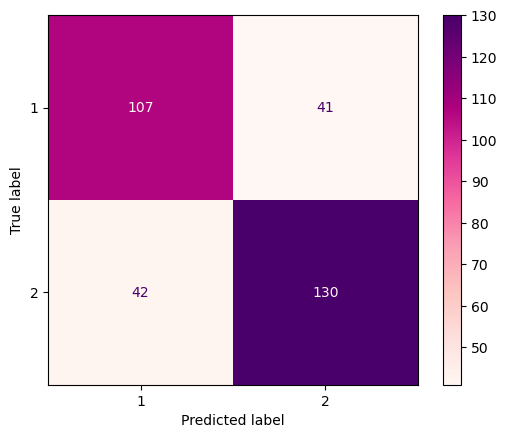

In [21]:
# adaboost classifier 
ada=AdaBoostClassifier()
model7=ada.fit(x_train, y_train)
print("train accuracy:",model7.score(x_train, y_train),"\n","test accuracy:",model7.score(x_test,y_test))

adapred = ada.predict(x_test)
print("\n")
print("classification report for adaboost classifier")
print(classification_report(adapred,y_test))
print("\n")
print("confusion matrix for adaboost classifier")
displr = plot_confusion_matrix(ada, x_test, y_test ,cmap=plt.cm.RdPu , values_format='d')
plt.show(displr)

[09:18:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuracy: 1.0 
 test accuracy: 0.815625


classification report for extreme gradient boosting classifier
              precision    recall  f1-score   support

           1       0.81      0.79      0.80       151
           2       0.82      0.83      0.83       169

    accuracy                           0.82       320
   macro avg       0.82      0.81      0.81       320
weighted avg       0.82      0.82      0.82       320



confusion matrix for extreme gradient boosting classifier


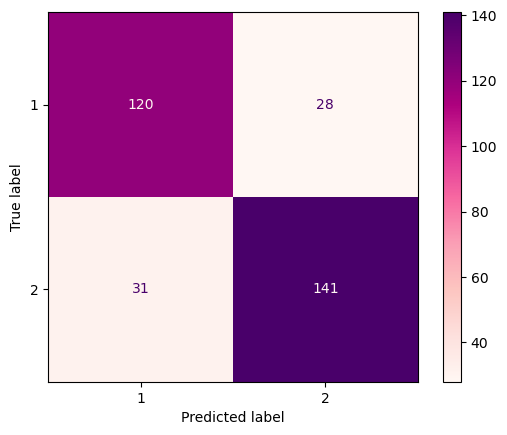

In [22]:
# extreme gradient boost classifier
xgb = XGBClassifier()
model8=xgb.fit(x_train.values, y_train)
print("train accuracy:",model8.score(x_train, y_train),"\n","test accuracy:",model8.score(x_test,y_test))

xgbpred = xgb.predict(x_test.values)
print("\n")
print("classification report for extreme gradient boosting classifier")
print(classification_report(xgbpred,y_test))
print("\n")
print("confusion matrix for extreme gradient boosting classifier")
displr = plot_confusion_matrix(xgb, x_test.values, y_test ,cmap=plt.cm.RdPu , values_format='d')
plt.show(displr)

train accuracy: 1.0 
 test accuracy: 0.84375


classification report for extra tree classifier
              precision    recall  f1-score   support

           1       0.84      0.82      0.83       152
           2       0.84      0.86      0.85       168

    accuracy                           0.84       320
   macro avg       0.84      0.84      0.84       320
weighted avg       0.84      0.84      0.84       320



confusion matrix for extra tree classifier


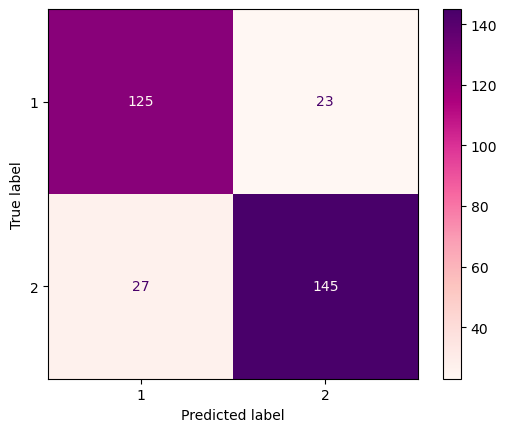

In [23]:
# extra tree classifier
extree = ExtraTreesClassifier()
model9=extree.fit(x_train, y_train)
print("train accuracy:",model9.score(x_train, y_train),"\n","test accuracy:",model9.score(x_test,y_test))

extpred = extree.predict(x_test)
print("\n")
print("classification report for extra tree classifier")
print(classification_report(extpred,y_test))
print("\n")
print("confusion matrix for extra tree classifier")
displr = plot_confusion_matrix(extree, x_test, y_test ,cmap=plt.cm.RdPu, values_format='d')
plt.show(displr)

train accuracy: 1.0 
 test accuracy: 0.840625


classification report for voting classifier
              precision    recall  f1-score   support

           1       0.82      0.83      0.83       147
           2       0.85      0.85      0.85       173

    accuracy                           0.84       320
   macro avg       0.84      0.84      0.84       320
weighted avg       0.84      0.84      0.84       320



confusion matrix for voting classifier


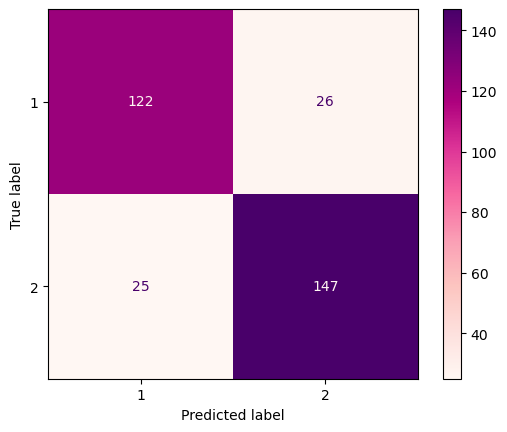

In [24]:
# voting classifer
from sklearn.ensemble import VotingClassifier
clf1 = ExtraTreesClassifier()
clf2 = RandomForestClassifier()

vc = VotingClassifier(estimators=[('ext', clf1),('rf', clf2)], voting='soft')
model10=vc.fit(x_train, y_train)
print("train accuracy:",model10.score(x_train, y_train),"\n","test accuracy:",model10.score(x_test,y_test))

vcpred = vc.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(vcpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
displr = plot_confusion_matrix(vc, x_test, y_test ,cmap=plt.cm.RdPu, values_format='d')
plt.show(displr)

train accuracy: 1.0 
 test accuracy: 0.84375


classification report for voting classifier
              precision    recall  f1-score   support

           1       0.85      0.82      0.83       154
           2       0.84      0.87      0.85       166

    accuracy                           0.84       320
   macro avg       0.84      0.84      0.84       320
weighted avg       0.84      0.84      0.84       320



confusion matrix for voting classifier


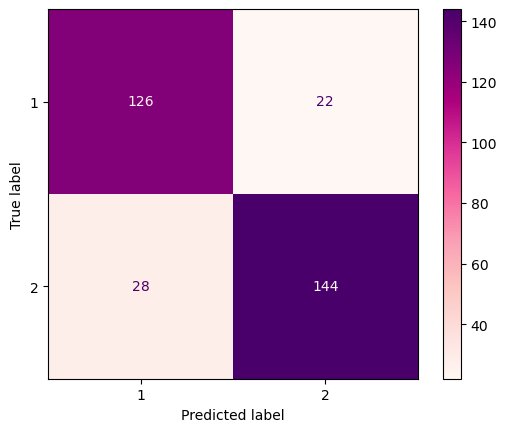

In [25]:
# stacking classifier 
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),('ext', make_pipeline(StandardScaler(),  ExtraTreesClassifier(random_state=42)))]
sc= StackingClassifier( estimators=estimators)

model11=sc.fit(x_train, y_train)
print("train accuracy:",model11.score(x_train, y_train),"\n","test accuracy:",model11.score(x_test,y_test))

scpred = sc.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(scpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
displr = plot_confusion_matrix(sc, x_test, y_test ,cmap=plt.cm.RdPu , values_format='d')
plt.show(displr)

stacking classifier gives the highest accuracy which is 85.31%. precision and recall values are also high for this model. hence with SMOTE resampling the best model is stacking classifier with random forest classifier and extra tree classifier.

### Model Without Resampling

let's see accuracy values without using smote resampling technique

train accuracy: 0.7427677873338546 
 test accuracy: 0.78125


classification report for logistic regression
              precision    recall  f1-score   support

           1       0.79      0.75      0.77       156
           2       0.77      0.81      0.79       164

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.78      0.78      0.78       320



confusion matrix for logistic regression


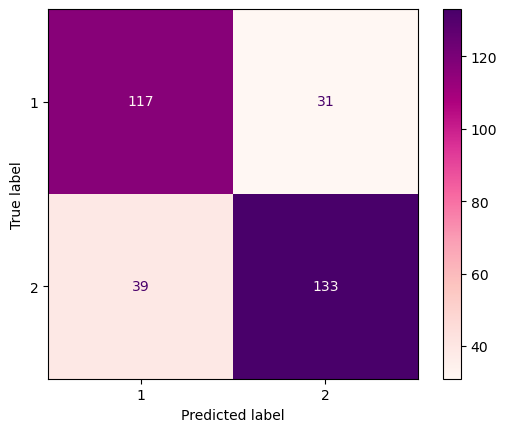

In [26]:
#logistic regression without resampling
lrw = LogisticRegression(max_iter=20000,penalty='l2')
model12=lrw.fit(x_train1, y_train1)
print("train accuracy:",model12.score(x_train1, y_train1),"\n","test accuracy:",model12.score(x_test,y_test))
lrwpred = lrw.predict(x_test)
print("\n")
print("classification report for logistic regression")
print(classification_report(lrwpred,y_test))
print("\n")
print("confusion matrix for logistic regression")
displr = plot_confusion_matrix(lrw, x_test, y_test ,cmap=plt.cm.RdPu , values_format='d')
plt.show(displr)

train accuracy: 0.7396403440187647 
 test accuracy: 0.7875


classification report for linear discriminant analysis
              precision    recall  f1-score   support

           1       0.80      0.76      0.78       156
           2       0.78      0.82      0.80       164

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320



confusion matrix for linear discriminant analysis


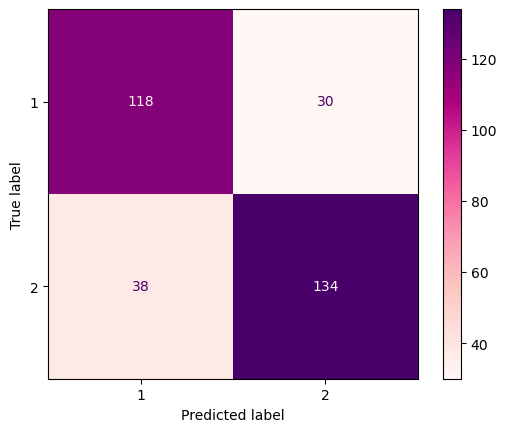

In [27]:
#linear discriminant analysis
ldaw = LinearDiscriminantAnalysis()
model13=ldaw.fit(x_train1, y_train1)
print("train accuracy:",model13.score(x_train1, y_train1),"\n","test accuracy:",model13.score(x_test,y_test))

ldawpred = ldaw.predict(x_test)
print("\n")
print("classification report for linear discriminant analysis")
print(classification_report(ldawpred,y_test))
print("\n")
print("confusion matrix for linear discriminant analysis")
displr = plot_confusion_matrix(ldaw, x_test, y_test ,cmap=plt.cm.RdPu , values_format='d')
plt.show(displr)

train accuracy: 1.0 
 test accuracy: 0.75


classification report for decision tree classifier
              precision    recall  f1-score   support

           1       0.71      0.74      0.72       142
           2       0.78      0.76      0.77       178

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



confusion matrix for decision tree classifier


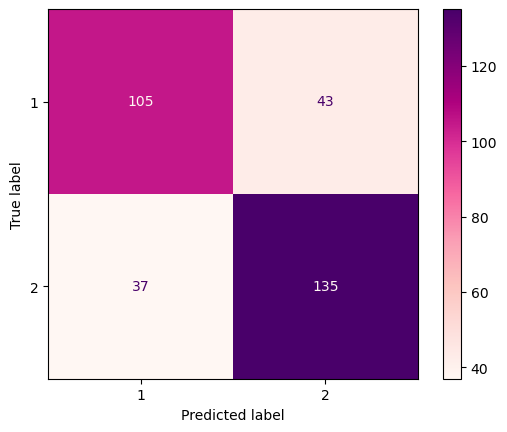

In [28]:
#decision tree classifier
dtw=DecisionTreeClassifier()
model14=dtw.fit(x_train1, y_train1)
print("train accuracy:",model14.score(x_train1, y_train1),"\n","test accuracy:",model14.score(x_test,y_test))

dtwpred = dtw.predict(x_test)
print("\n")
print("classification report for decision tree classifier")
print(classification_report(dtwpred,y_test))
print("\n")
print("confusion matrix for decision tree classifier")
displr = plot_confusion_matrix(dtw, x_test, y_test ,cmap=plt.cm.RdPu , values_format='d')
plt.show(displr)

train accuracy: 1.0 
 test accuracy: 0.85625


classification report for random forest classifier
              precision    recall  f1-score   support

           1       0.84      0.84      0.84       148
           2       0.87      0.87      0.87       172

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320



confusion matrix for random forest classifier


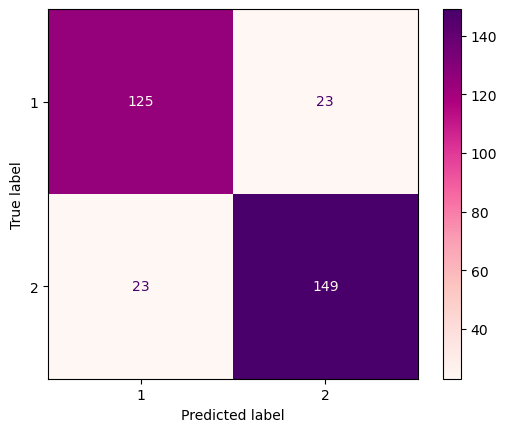

In [29]:
rfw=RandomForestClassifier()
model15=rfw.fit(x_train1, y_train1)
print("train accuracy:",model15.score(x_train1, y_train1),"\n","test accuracy:",model15.score(x_test,y_test))

rfwpred = rfw.predict(x_test)
print("\n")
print("classification report for random forest classifier")
print(classification_report(rfwpred,y_test))
print("\n")
print("confusion matrix for random forest classifier")
displr = plot_confusion_matrix(rfw, x_test, y_test ,cmap=plt.cm.RdPu , values_format='d')
plt.show(displr)

train accuracy: 0.9851446442533229 
 test accuracy: 0.8


classification report for bagging classifier
              precision    recall  f1-score   support

           1       0.82      0.76      0.79       160
           2       0.78      0.84      0.81       160

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320



confusion matrix for bagging classifier


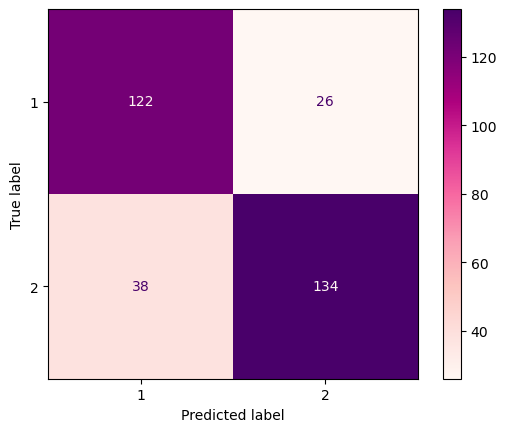

In [30]:
bgw=BaggingClassifier()
model16=bgw.fit(x_train1, y_train1)
print("train accuracy:",model16.score(x_train1, y_train1),"\n","test accuracy:",model16.score(x_test,y_test))

bgwpred = bgw.predict(x_test)
print("\n")
print("classification report for bagging classifier")
print(classification_report(bgwpred,y_test))
print("\n")
print("confusion matrix for bagging classifier")
displr = plot_confusion_matrix(bgw, x_test, y_test ,cmap=plt.cm.RdPu , values_format='d')
plt.show(displr)

train accuracy: 0.874120406567631 
 test accuracy: 0.803125


classification report for gradient boosting classifier
              precision    recall  f1-score   support

           1       0.80      0.78      0.79       153
           2       0.80      0.83      0.81       167

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320



confusion matrix for gradient boosting classifier


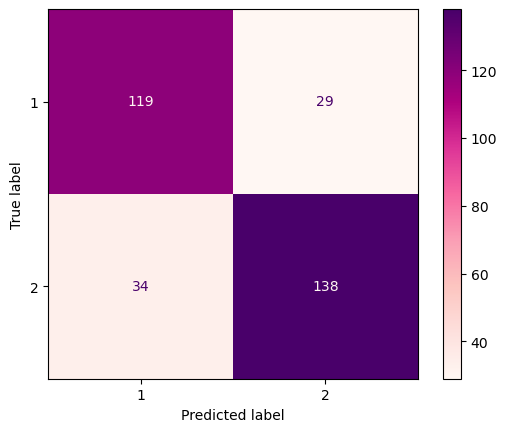

In [31]:
gbmw=GradientBoostingClassifier()
model17=gbmw.fit(x_train1, y_train1)
print("train accuracy:",model17.score(x_train1, y_train1),"\n","test accuracy:",model17.score(x_test,y_test))

gbmwpred = gbmw.predict(x_test)
print("\n")
print("classification report for gradient boosting classifier")
print(classification_report(gbmwpred,y_test))
print("\n")
print("confusion matrix for gradient boosting classifier")
displr = plot_confusion_matrix(gbmw, x_test, y_test ,cmap=plt.cm.RdPu , values_format='d')
plt.show(displr)

train accuracy: 0.7998436278342455 
 test accuracy: 0.7625


classification report for adaboost classifier
              precision    recall  f1-score   support

           1       0.74      0.75      0.74       146
           2       0.78      0.78      0.78       174

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320



confusion matrix for adaboost classifier


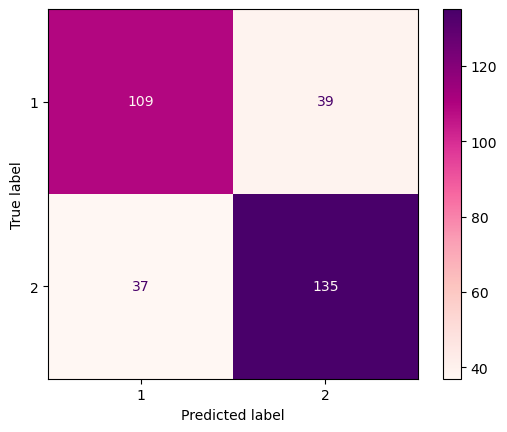

In [32]:
adaw=AdaBoostClassifier()
model18=adaw.fit(x_train1, y_train1)
print("train accuracy:",model18.score(x_train1, y_train1),"\n","test accuracy:",model18.score(x_test,y_test))

adawpred = adaw.predict(x_test)
print("\n")
print("classification report for adaboost classifier")
print(classification_report(adawpred,y_test))
print("\n")
print("confusion matrix for adaboost classifier")
displr = plot_confusion_matrix(adaw, x_test, y_test ,cmap=plt.cm.RdPu , values_format='d')
plt.show(displr)

[09:18:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuracy: 1.0 
 test accuracy: 0.825


classification report for extreme gradient boosting classifier
              precision    recall  f1-score   support

           1       0.82      0.81      0.81       150
           2       0.83      0.84      0.84       170

    accuracy                           0.82       320
   macro avg       0.82      0.82      0.82       320
weighted avg       0.82      0.82      0.82       320



confusion matrix for extreme gradient boosting classifier


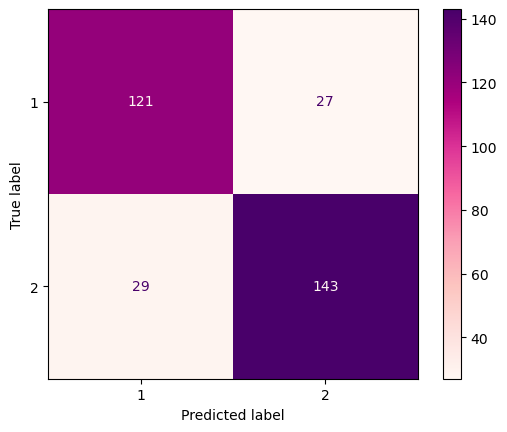

In [33]:
xgbw = XGBClassifier()
model19=xgbw.fit(x_train1.values, y_train1)
print("train accuracy:",model19.score(x_train1, y_train1),"\n","test accuracy:",model19.score(x_test,y_test))

xgbwpred = xgbw.predict(x_test.values)
print("\n")
print("classification report for extreme gradient boosting classifier")
print(classification_report(xgbwpred,y_test))
print("\n")
print("confusion matrix for extreme gradient boosting classifier")
displr = plot_confusion_matrix(xgbw, x_test.values, y_test ,cmap=plt.cm.RdPu, values_format='d')
plt.show(displr)

train accuracy: 1.0 
 test accuracy: 0.825


classification report for extra tree classifier
              precision    recall  f1-score   support

           1       0.82      0.80      0.81       152
           2       0.83      0.85      0.84       168

    accuracy                           0.82       320
   macro avg       0.82      0.82      0.82       320
weighted avg       0.82      0.82      0.82       320



confusion matrix for extra tree classifier


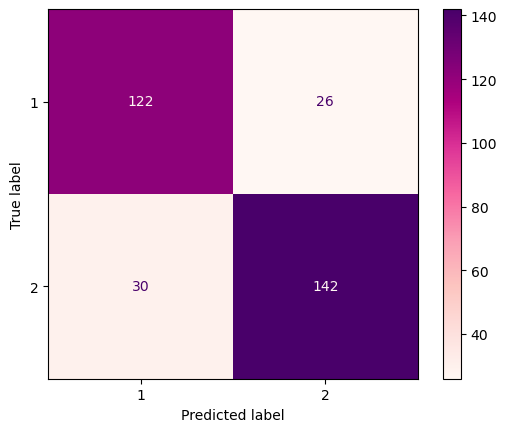

In [34]:
extreew = ExtraTreesClassifier()
model20=extreew.fit(x_train1, y_train1)
print("train accuracy:",model20.score(x_train1, y_train1),"\n","test accuracy:",model20.score(x_test,y_test))

extwpred = extreew.predict(x_test)
print("\n")
print("classification report for extra tree classifier")
print(classification_report(extwpred,y_test))
print("\n")
print("confusion matrix for extra tree classifier")
displr = plot_confusion_matrix(extreew, x_test, y_test ,cmap=plt.cm.RdPu , values_format='d')
plt.show(displr)

train accuracy: 1.0 
 test accuracy: 0.85


classification report for voting classifier
              precision    recall  f1-score   support

           1       0.82      0.85      0.84       144
           2       0.87      0.85      0.86       176

    accuracy                           0.85       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.85      0.85      0.85       320



confusion matrix for voting classifier


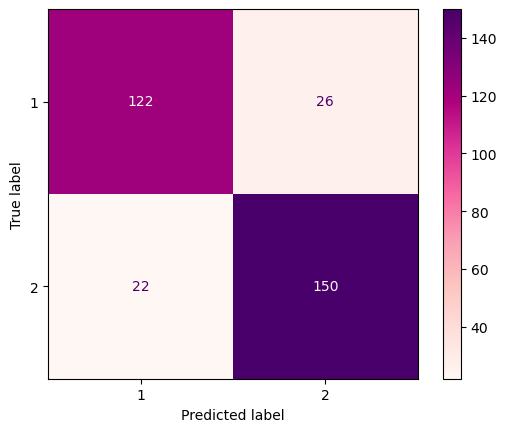

In [35]:
clf1 = ExtraTreesClassifier()
clf2 = RandomForestClassifier()

vcw = VotingClassifier(estimators=[('ext', clf1),('rf', clf2)], voting='soft')
model21=vcw.fit(x_train1, y_train1)
print("train accuracy:",model21.score(x_train1, y_train1),"\n","test accuracy:",model21.score(x_test,y_test))

vcwpred = vcw.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(vcwpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
displr = plot_confusion_matrix(vcw, x_test, y_test ,cmap=plt.cm.RdPu , values_format='d')
plt.show(displr)

train accuracy: 1.0 
 test accuracy: 0.859375


classification report for voting classifier
              precision    recall  f1-score   support

           1       0.83      0.86      0.85       143
           2       0.88      0.86      0.87       177

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320



confusion matrix for voting classifier


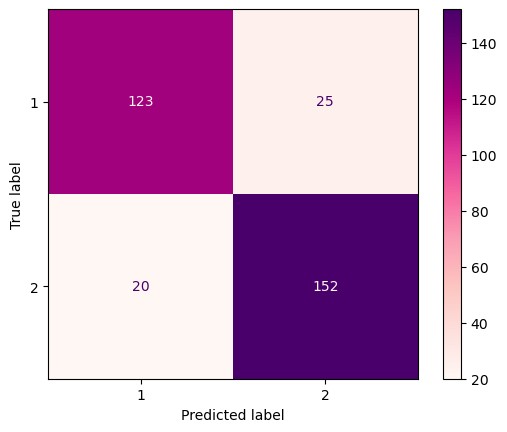

In [36]:
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=2)),('ext', make_pipeline(StandardScaler(),  ExtraTreesClassifier(random_state=12)))]
scw= StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())

model22=scw.fit(x_train1, y_train1)
print("train accuracy:",model22.score(x_train1, y_train1),"\n","test accuracy:",model22.score(x_test,y_test))

scwpred = scw.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(scwpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
displr = plot_confusion_matrix(scw, x_test, y_test ,cmap=plt.cm.RdPu , values_format='d')
plt.show(displr)

## Conclusion

from the above models stacking classifier and random forest classifier have higher perfromance than other models. stacking classifier is the one with highest accuracy 85.94%. We can see that without resampling there is a slight increase in accuracy. hence the model without SMOTE resampling is the best one. The accuracy can be increased by tuning hyper parameters of these models using scikit learn randomized grid search.